In [30]:
from PIL import Image
import torch
from torch.autograd import Variable

In [16]:
import torchvision.models as models
import torchvision.transforms as transforms

In [5]:
m = models.alexnet(pretrained=True)

In [11]:
m

AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
    (6): Linear (4096 -> 1000)
  )
)

In [15]:
for p in m.modules():
    if type(p) is torch.nn.modules.conv.Conv2d:
        print(p)

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [24]:
imageTransform = transforms.Compose( (transforms.Scale(300), transforms.RandomCrop(225), transforms.ToTensor()) )

In [18]:
image1 = Image.open('../../foo.jpg')

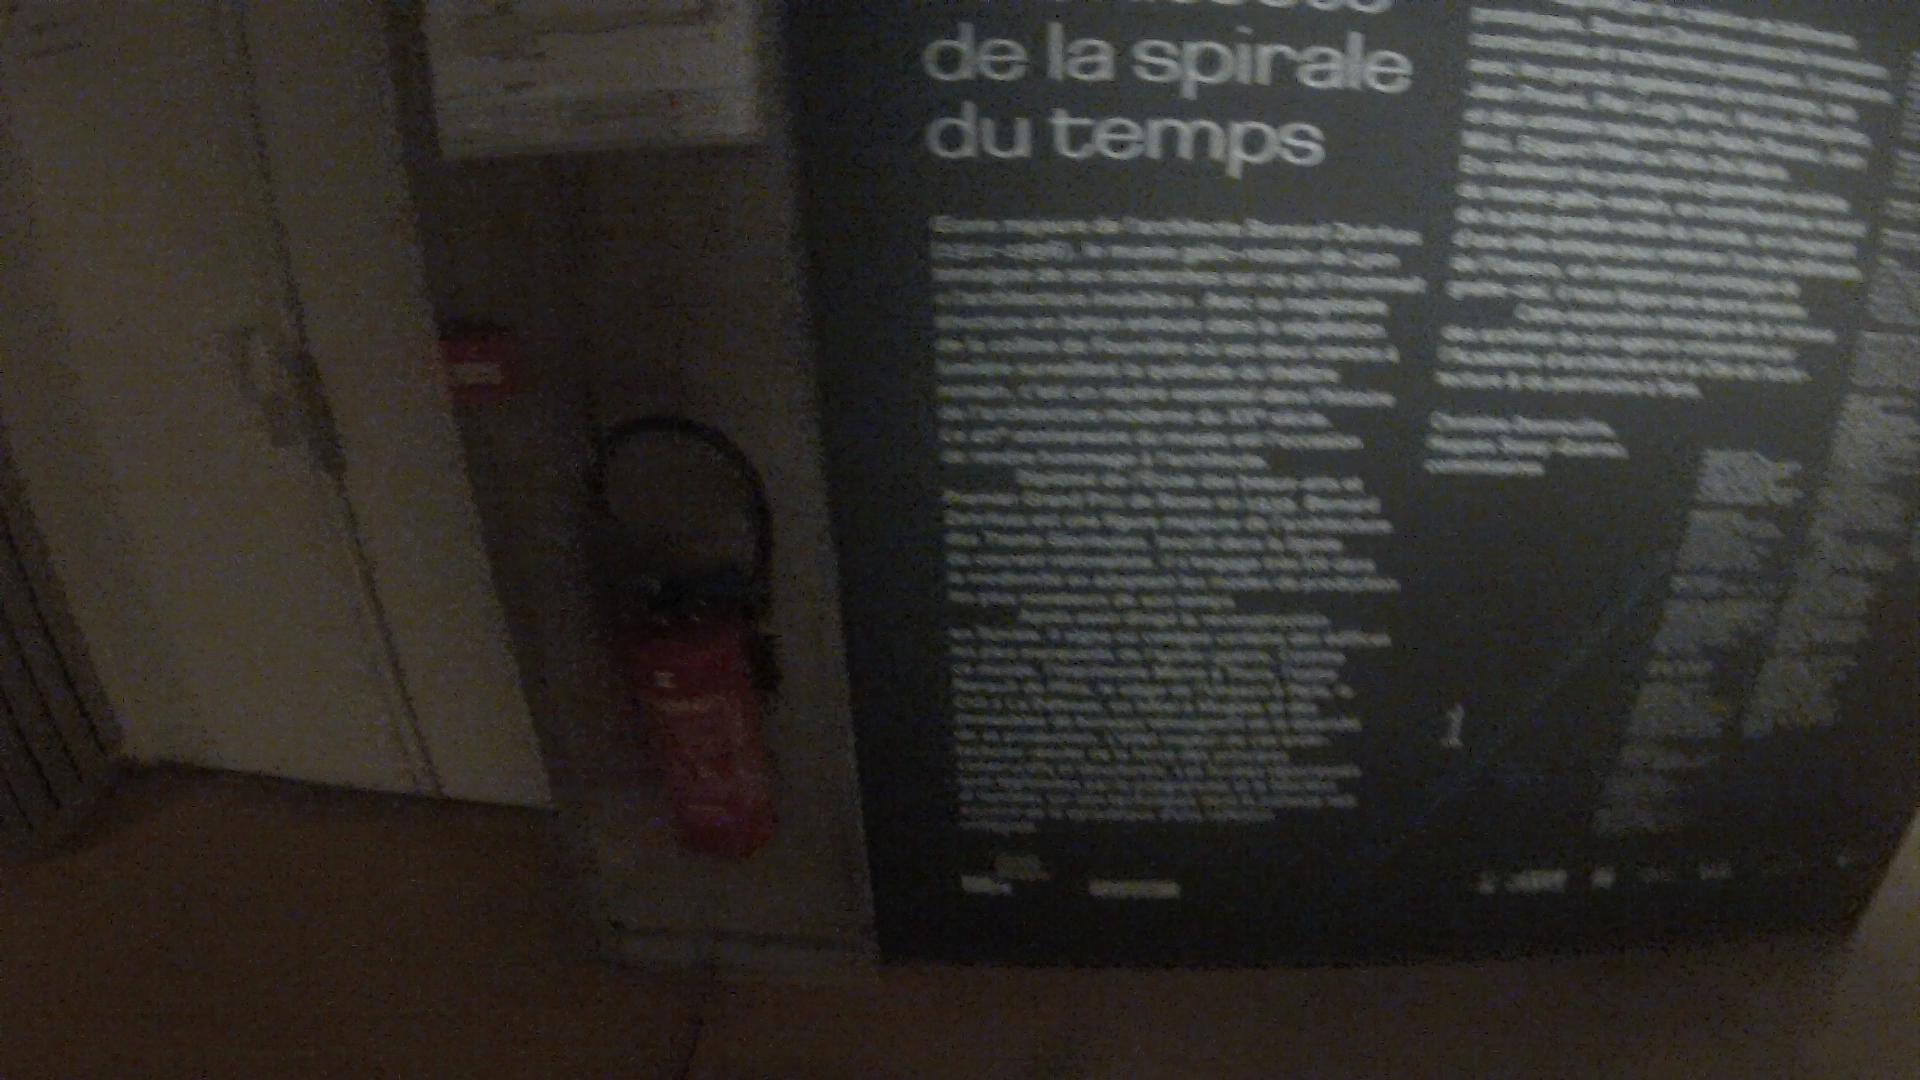

In [27]:
image1

In [32]:
im = imageTransform(image1)
im.size()

torch.Size([3, 225, 225])

In [35]:
t = torch.Tensor(1, 3, 225, 225)
t[0] = im

In [61]:
m.features[0].bias

Parameter containing:
-0.9705
-2.8070
-0.0371
-0.0795
-0.1159
 0.0252
-0.0752
-1.4181
 1.6454
-0.0990
-0.0161
-0.1282
-0.0658
-0.0345
-0.0743
-1.2977
-0.0505
 0.0121
-0.1013
-1.1887
-0.1380
-0.0492
-0.0789
-0.0405
-0.0958
-0.0705
-1.9374
-0.0850
-0.1388
-0.1968
-0.1279
-2.0095
-0.0476
-0.0604
-0.0351
-0.3843
-2.7823
 0.6605
-0.1655
-2.1293
 0.0543
-0.0274
-0.1703
-0.0593
-0.4215
-1.9394
-1.2094
 0.0153
-0.1081
-0.0248
-0.1503
-1.8516
-0.0928
-0.0177
-0.0700
-0.0582
-0.0630
-0.0721
-1.2678
-0.1176
-0.0441
-0.3259
 0.0507
-0.0146
[torch.FloatTensor of size 64]

In [55]:
m(Variable(t)).max(1)

(Variable containing:
  6.5166
 [torch.FloatTensor of size 1x1], Variable containing:
  844
 [torch.LongTensor of size 1x1])